# Zadanie 3
Zastosuj różne metody ekstrakcji cech, takie jak statystyki opisowe (np. średnia, odchylenie
standardowe, kwantyle), transformacje czasowe (np. różnicowanie, dekompozycja), do szeregu czasowego. Porównaj wyniki różnych metod ekstrakcji cech i ich przydatność w analizie szeregu czasowego. Przeprowadź analizę porównawczą, oceniając skuteczność poszczególnych metod w identyfikacji istotnych wzorców lub trendów w danych.

In [1]:
import pandas as pd
import yfinance as yf
import statsmodels as sts
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf
from statsmodels.robust import mad
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import PCA

In [59]:
# Pobranie danych z yahoo finance i wstawienie do pandas dataframe
data = yf.download('SGN.WA', start='2015-01-01', end='2024-01-01')
# Nazwy kolumn tworzymy na podstawie pierwszego rekordu
data = data.reset_index()
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Utworzenie kompletnego zakresu dat od pierwszej do ostatniej daty w danych
complete_date_range = pd.date_range(start=data['Date'].min(), end=data['Date'].max(), freq='D')

# Utworzenie DataFrame z kompletnym zakresem dat
complete_data = pd.DataFrame({'Date': complete_date_range})
# Połączenie danych z kompletnym zakresem dat
data = pd.merge(complete_data, data, on='Date', how='left')
data['Close'] = data['Close'].interpolate(method="linear")
#data.set_index('Date', inplace=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Close
0,2015-01-01,13.650000
1,2015-01-02,13.650000
2,2015-01-03,13.586666
3,2015-01-04,13.523333
4,2015-01-05,13.460000


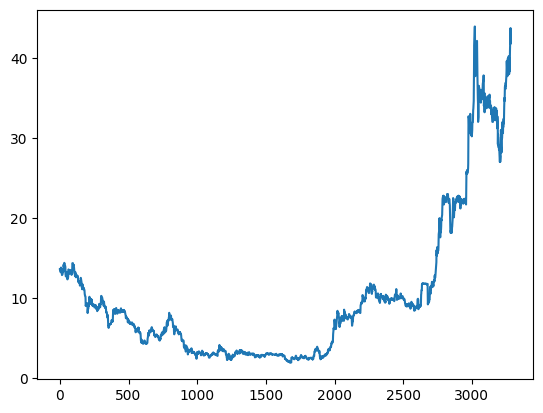

In [60]:
plt.plot(data['Close'])

In [63]:
# PCA
ts = data
ts['Date'] = pd.to_numeric(data['Date'], errors='coerce')
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(ts)
transformed_data

array([[ 1.41868800e+17,  1.29928679e+01],
       [ 1.41782400e+17,  1.29870507e+01],
       [ 1.41696000e+17,  1.29179003e+01],
       ...,
       [-1.41696000e+17,  2.39509038e+01],
       [-1.41782400e+17,  2.30450851e+01],
       [-1.41868800e+17,  2.20392679e+01]])

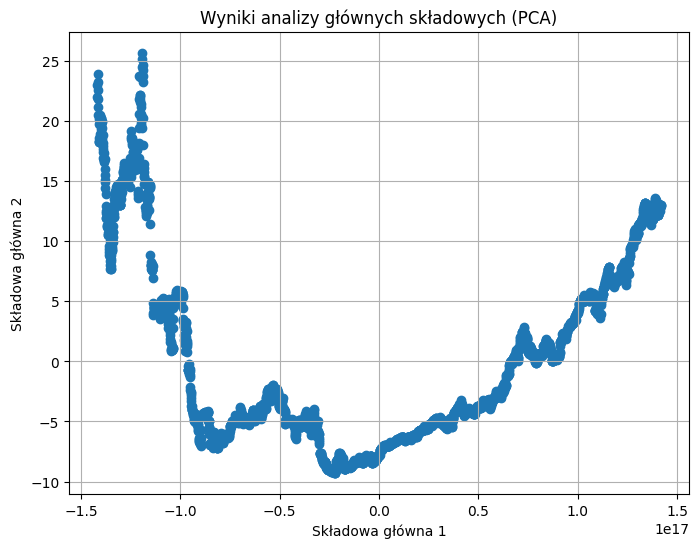

In [64]:
# Wykres wyników PCA
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
plt.show()